# Test CNN models

Give average accuracies for each task, and generate confusion matrix plots.

In [1]:
import sys
sys.path.append("..")

import json
import numpy as np
import keras
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

2023-08-25 12:42:53.433369: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-25 12:43:32.713044: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from test_model import plot_cm, model_dir, output_dir
from cnn_data import load_data

Importing lots of stuff...


In [3]:
def max_argmax(arr, axis):
    # When all elements are equal, default to largest label
    max_indices = np.argmax(arr, axis=axis)
    equal_indices = np.where(np.all(arr == arr[:, [0]], axis=1))[0]
    default_indices = [arr.shape[1] - 1] * equal_indices.shape[0]
    max_indices[equal_indices] = default_indices
    return max_indices

In [4]:
def evaluate_cnn(task_name):
    print(f"Loading data for task {task_name}...")
    X_test, Y_test, _, _ = load_data(task_name)
    print(f"Loading model...")
    cnn = keras.models.load_model(f"{model_dir}/{task_name}_cnn")
    
    Y_pred = max_argmax(cnn.predict(X_test, batch_size=900), axis=1)
    
    cm = confusion_matrix(Y_test, Y_pred).astype(float)
    cm /= np.sum(cm, axis=1, keepdims=True)
    task2label = {
        "scalar1": r"$s\rightarrow\pi^0\pi^0$",
        "axion1": r"$a\rightarrow\gamma\gamma$",
        "axion2": r"$a\rightarrow3\pi^0$"
    }
    labels = [r"$\pi^0$", r"$\gamma$", task2label[task_name]]
    perm = [[2, 1, 0]] * 3
    
    os.makedirs(f"{output_dir}/cnn", exist_ok=True)
    plot_cm(
        cm,
        labels=labels,
        save_path=f"{output_dir}/cnn/{task_name}_cm.pdf"
    )
    test_accuracy = np.mean(Y_pred == Y_test)
    print(f"\nMean test accuracy for {task_name}: {test_accuracy:.5f}")
    
    return test_accuracy, cm

In [ ]:
evaluate_cnn("scalar1");

Loading data for task axion1...
load_data from datafile /usatlas/atlas01/atlasdisk/users/atlas_wifeng/photon-jet/data/h5/pi0_40-250GeV_100k.h5
load_data from datafile /usatlas/atlas01/atlasdisk/users/atlas_wifeng/photon-jet/data/h5/gamma_40-250GeV_100k.h5
load_data from datafile /usatlas/atlas01/atlasdisk/users/atlas_wifeng/photon-jet/data/h5/axion1_40-250GeV_100k.h5
Loading model...


2023-08-25 12:45:22.214094: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15363 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:07:00.0, compute capability: 6.0
2023-08-25 12:45:31.987901: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600


234/234 [==============================] - 16s 3ms/step

Mean test accuracy for axion1: 0.80844


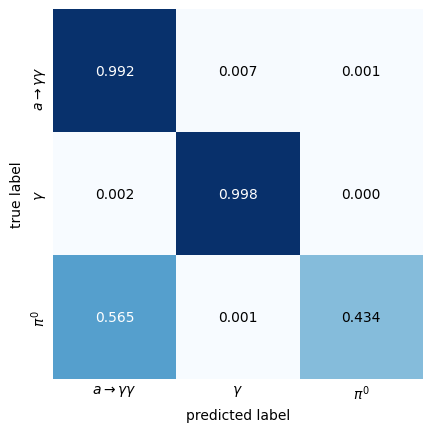

In [5]:
evaluate_cnn("axion1");